# JPL Small-Body Mission Design API Tutorial

This Jupyter Notebook introduces the use of the JPL Small-Body Mission Design API. It will demonstrate how to query small body data, extract trajectory information, and use this data for planning or analysis purposes.

In [24]:
# Section 1: Import Required Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from astropy.time import Time
import numpy as np

In [25]:
# Section 2: API Overview and Base URL
base_url = "https://ssd-api.jpl.nasa.gov/mdesign.api"

In [26]:
# Section 3: Define a helper function to pretty-print JSON responses
def query_api(params):
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    return response.json()

In [69]:
# Section 4: Define Parameters for Pork-Chop Plot
# We'll sweep launch dates and TOF values for 1P/Halley
launch_start = Time('2025-01-01T00:00:00',format='isot').mjd

launch_span = 365 #Days 
tof_min = 90 #Days
tof_max = 1500 #Days


In [88]:

# Section 5: Query and Build Pork-Chop Data Grid
target = "1P" #this is the short designation for the target
porkchop_data = []

print("Gathering pork-chop data (this may take a few minutes)...")
params = {
            "des": target,
            "mjd0": int(launch_date),
            "tof-min": tof_min,
            "tof-max": tof_max,
            "span": 90,
            "step":1,
        }
        
try:
    result = query_api(params)
    traj_data = result["selectedMissions"]
except Exception as e:
    print(f"Failed for {launch_date} TOF {tof}: {e}")    
print('Done')


Gathering pork-chop data (this may take a few minutes)...
Done


In [83]:
#Check out our data columns
pprint(result["fields"])
df = pd.DataFrame(traj_data,columns=result["fields"])
print(df)

['MJD0',
 'MJDf',
 'vinf_dep',
 'vinf_arr',
 'phase_ang',
 'earth_dist',
 'elong_arr',
 'decl_dep',
 'approach_ang',
 'tof']
     MJD0   MJDf  vinf_dep  vinf_arr  phase_ang  earth_dist  elong_arr  \
0   60159  60549   12.2474   12.8299       8.68      5.2677      66.81   
1   65559  67254   12.2454    0.3349     104.09      2.6329     152.41   
2   63734  65259   12.2434    0.4489      32.11      4.8746       4.54   
3   62744  63119   12.2424   20.6901       4.05      5.1954      51.74   
4   64959  65254   12.2371   24.7424       3.32      4.8969       6.09   
..    ...    ...       ...       ...        ...         ...        ...   
75  63809  65629    0.7997   14.0628      30.79      1.3509      49.60   
76  62929  63694    0.5213   12.3877      45.19      0.6112      70.63   
77  62529  63694    0.3462   12.5309      43.58      0.6112      70.63   
78  62139  63694    0.2400   12.6915      42.48      0.6112      70.63   
79  62049  63694    0.2193   13.1327      40.35      0.6112  

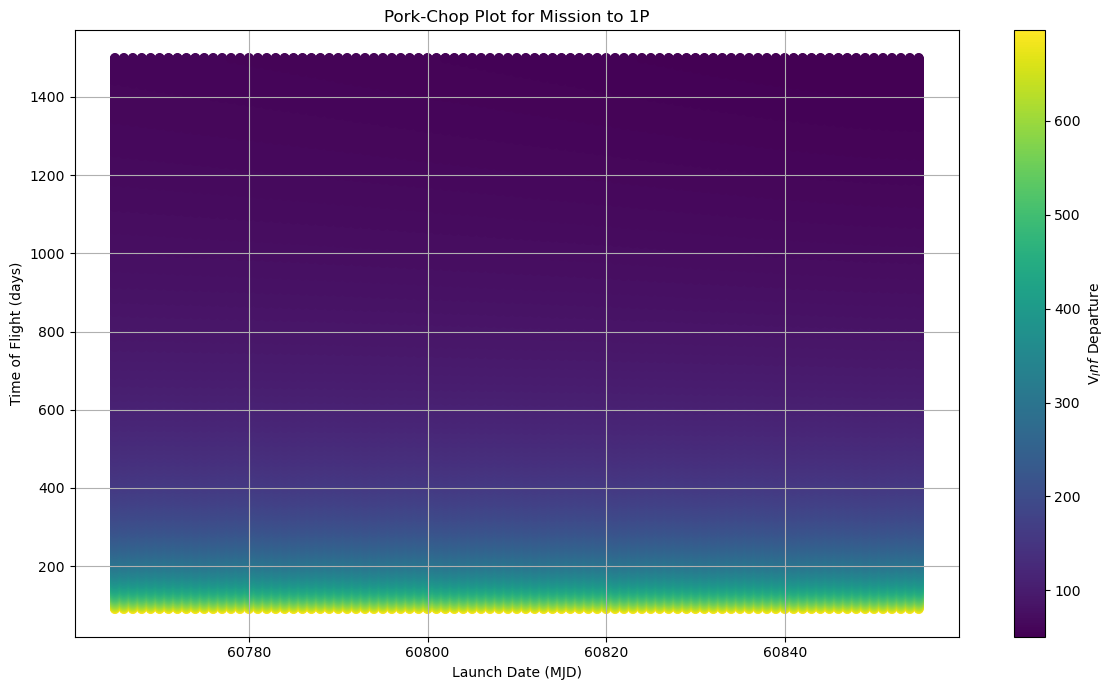

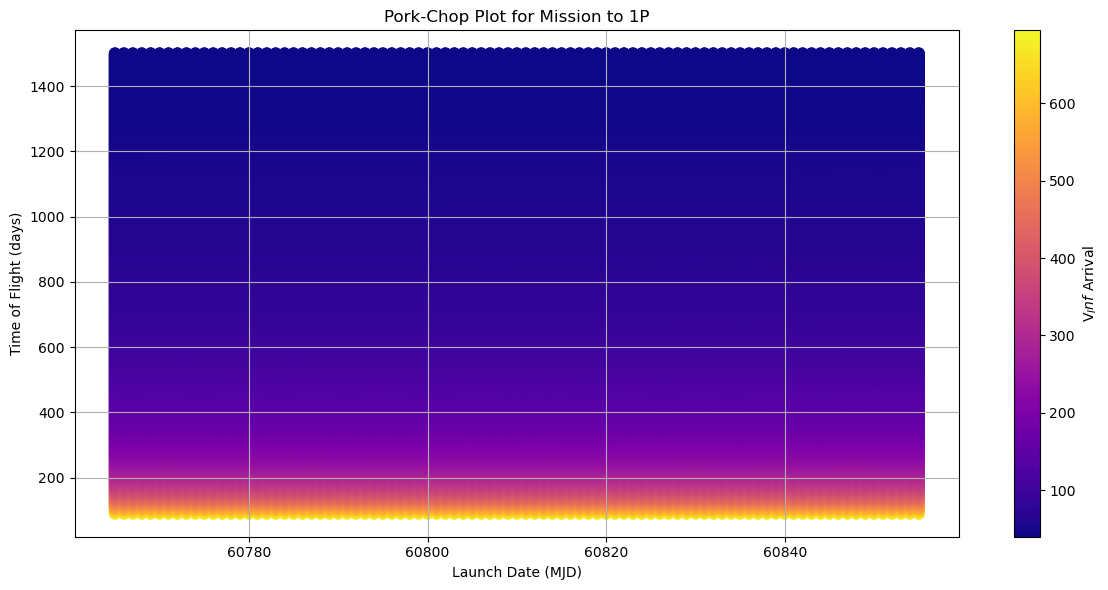

In [89]:
#Section 6: Build DataFrame and Generate Pork-Chop Plot

# Pivot data for contour plot
#pivot = df.pivot(index='tof', columns='MJD0', values='vinf_dep')
#X, Y = np.meshgrid(pivot.columns, pivot.index)
#Z = pivot.values

#Departure velocity
dep_date = result["dep_date"]
tof = result["tof"]
vinf_dep = result["vinf_dep"]
vinf_arr = result["vinf_arr"]

dep_mesh,tof_mesh = np.meshgrid(dep_date,tof)

# Convert launch dates back to datetime for labels
#launch_labels = [datetime.fromordinal(int(jd)) for jd in pivot.columns]

plt.figure(figsize=(12, 7))
#cp = plt.contour(X,Y,Z,levels=5,cmap='viridis')
cp = plt.scatter(dep_mesh, tof_mesh, c=vinf_dep, cmap='viridis')
plt.colorbar(cp, label='V$_Inf$ Departure')
plt.title(f"Pork-Chop Plot for Mission to {target}")
plt.xlabel("Launch Date (MJD)")
plt.ylabel("Time of Flight (days)")
#plt.xticks(ticks=pivot.columns[::5], labels=[d.strftime('%Y-%m-%d') for d in launch_labels[::5]], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Section 6:V_inf Arrival plot
plt.figure(figsize=(12, 6))
filtered = df.dropna(subset=['vinf_arr'])
sc = plt.scatter(dep_mesh, tof_mesh, c=vinf_arr, cmap='plasma', s=60)
plt.colorbar(sc, label='V$_Inf$ Arrival')
plt.xlabel("Launch Date (MJD)")
plt.ylabel("Time of Flight (days)")
plt.title(f"Pork-Chop Plot for Mission to {target}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
#Get some statistics on this particular query
print(f"Average Time of Flight:"+str(np.mean(df['tof'])))
print(f"Median Time of Flight:"+str(np.median(df['tof'])))
print(f"Lowest Intercept Velocity:"+str(np.min(df['vinf_arr'])))
print(f"Lowest Departure Velocity:"+str(np.min(df['vinf_dep'])))
print(f"Lowest Intercept Velocity:"+str(np.min(df['vinf_arr'])))
print(f"Lowest Departure Velocity:"+str(np.min(df['vinf_dep'])))


Average Time of Flight:1501.5
Median Time of Flight:1575.0
Lowest Intercept Velocity:0.2964
Lowest Departure Velocity:0.2193
Lowest Intercept Velocity:0.2964
Lowest Departure Velocity:0.2193


_End of notebook_